# Lab 3 
## W203 Statistics for Data Science
### Annabelle Lee, Joy Chiang, Lucas Lam

## Introduction

**Research Question:** What variables have impact to reduce the crime rate in North Carolina?

The purpose of report is to provide the local government with information supporting policies to lower crime rates in North Carolina. We would like to study the scenarios enabling criminals to carry out a crime successfully when facing punishment. This entails a detailed analysis on crime rate and factors including the demographic of criminals, police involved, and probability of punishment. 

Ultimately, we want to set policy in such a way that incentivizes better choices and sets up deterrents for future criminal activity. Variables capturing certainty and severity of punishment help us think about the practical implications involved with carrying out crime. We will also look at the population of young males since gender and age are usually some of the informational predictors of crime.

In [1]:
# install.packages('car')
# install.packages('stargazer')
# install.packages('plyr')

## Initial Data Loading / Cleaning and EDA

In [31]:
library(car)
library(stargazer)
library(plyr)

variable  | label
----------|------
1    county|               county identifier
2      year|                            1987
3    crmrte|     crimes committed per person
4    prbarr|         'probability' of arrest
5   prbconv|     'probability' of conviction
6   prbpris| 'probability' of prison sentence
7    avgsen|             avg. sentence, days
8     polpc|               police per capita
9   density|             people per sq. mile
10    taxpc|          tax revenue per capita
11     west|           =1 if in western N.C.
12  central|           =1 if in central N.C.
13    urban|                   =1 if in SMSA
14 pctmin80|            perc. minority, 1980
15     wcon|       weekly wage, construction
16     wtuc|    wkly wge, trns, util, commun
17     wtrd| wkly wge, whlesle, retail trade
18     wfir|    wkly wge, fin, ins, real est
19     wser|      wkly wge, service industry
20     wmfg|         wkly wge, manufacturing
21     wfed|         wkly wge, fed employees
22     wsta|       wkly wge, state employees
23     wloc|        wkly wge, local gov emps
24      mix| offense mix: face-to-face/other
25  pctymle|              percent young male

In [3]:
crime = read.csv(file = 'crime_v2.csv')
crime

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
<int>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,⋯,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,⋯,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,⋯,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,⋯,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,⋯,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,⋯,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920
13,87,0.0296409,0.365004,0.520606995,0.420833,10.55,0.00133771,0.5169492,30.69649,⋯,366.3004,205.5358,310.1737,259.3391,303.42,449.84,350.72,283.76,0.15237226,0.07073344
15,87,0.0202814,0.392111,0.769231021,0.507692,10.64,0.00103525,0.3009986,34.00304,⋯,353.2182,199.2377,356.1254,206.2816,235.05,416.49,370.62,297.13,0.23495702,0.07430546
17,87,0.0304289,0.251599,0.436441004,0.436893,7.32,0.00129761,0.3503982,34.96204,⋯,346.6011,202.9595,268.3363,208.2520,339.76,389.51,322.06,278.39,0.21818182,0.07769163


In [4]:
summary(crime)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

Looking at an initial summary of the data, here are some observations:
- "prbconv" immediately stands out and needs to be cleaned. 
- Every feature other than "prbconv" has 6 NA values. From command `tail(crime)` we know its the bottom 6
- "prbarr" has a value over 1, indicating that the ratio of arrests is greater than offenses in a county in North Carolina, which doesn't make sense, and is a significant outlier. 
- one county has "taxpc" or tax revenue per capita of over 100 which looks like an outlier.
- One county's "wser" or weekly wage for service industry is extremely high

Other than these observations, data seems reasonable at first glance. 

In [5]:
# First we will get rid of bottom 6 rows with all values N/A. They are meaningless
crime <- crime[1:91,]

### Clean up probabilities

In [6]:
# Turning prbconv into numeric values because there were non-numeric variables and putting into new dataframe "crime_cleaned." 
# Will be using crime_cleaned for the rest of data analysis

crime$prbconv <- as.numeric(levels(crime$prbconv))[crime$prbconv]
crime_cleaned = crime[!is.na(crime$prbconv), ]

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

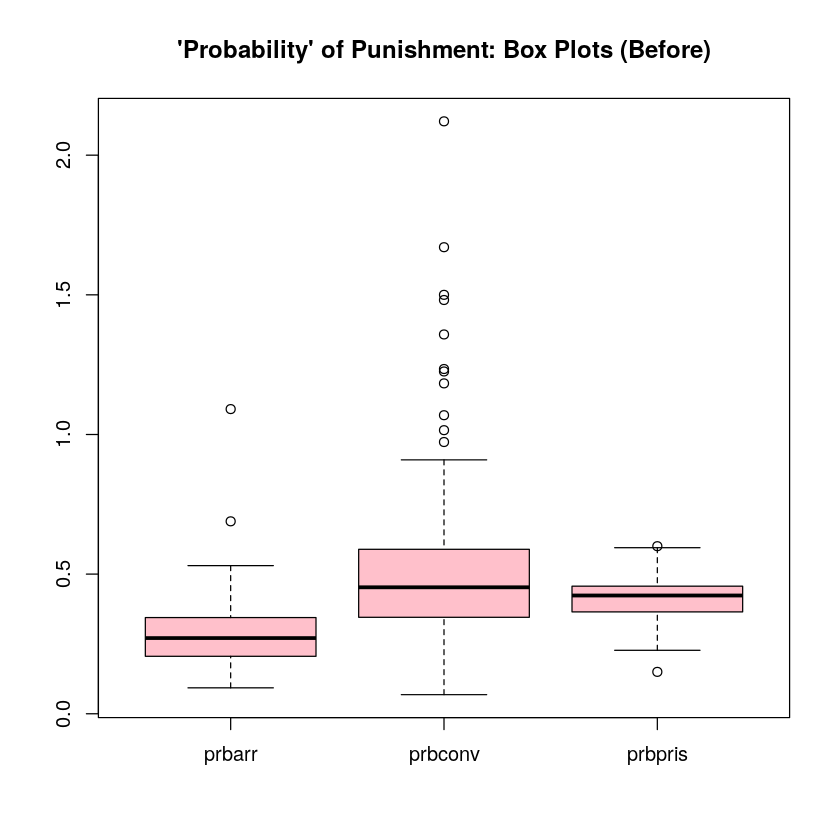

In [7]:
boxplot(crime_cleaned[c(4:6)],
        data=crime_cleaned,
        main="'Probability' of Punishment: Box Plots (Before)",
        col="pink")

"Prbconv" now has numeric values, and so does "prbarr" and "prbpris", but some of which doesn't make sense. Probability of Conviction (prbconv) and probability of arrest (prbarr) should not have values over 1, because that would imply that no. of convictions is greater than no. arrests or no. of arrests is greater than no. offenses, which makes no sense. We will replace all values over 1 with NA value. 

It's important to note that "prbconv" probabilities being closer to 1 and higher than other probabilities makes sense, because it is more likely for someone to be convicted after being arrested than someone to be arrested after an offense, since a lot of offenses can happen without the police noticing. It's the probabilities that are over 1 that make no logical sense, so we replace them with NA.



In [32]:
# cleaning prbconv
crime_cleaned$prbconv[crime_cleaned$prbconv > 1] = NA
summary(crime_cleaned$prbconv, na.rm = T)

# cleaning prbbarr
crime_cleaned$prbarr[crime_cleaned$prbarr > 1] = NA
summary(crime_cleaned$prbarr, na.rm = T)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06838 0.33470 0.43896 0.44824 0.52760 0.97297 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.09277 0.22154 0.28733 0.29673 0.35035 0.68902 

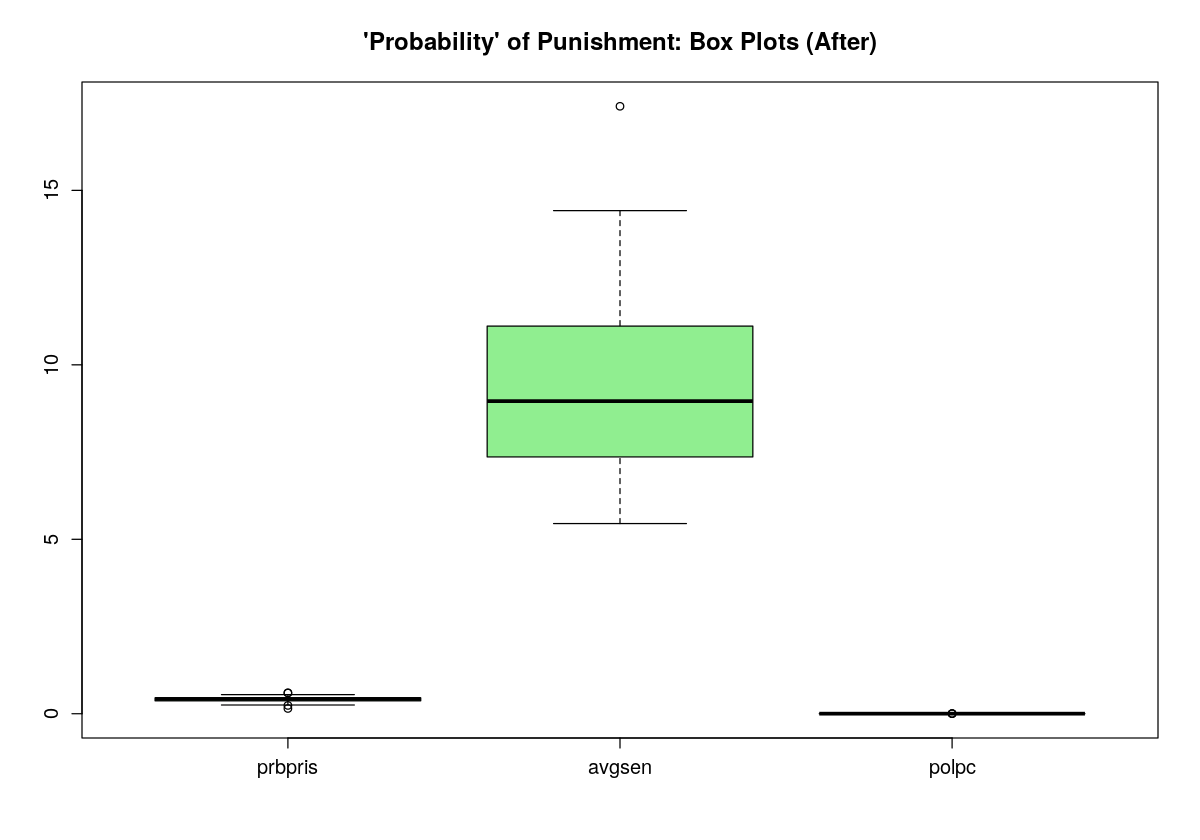

In [33]:
boxplot(crime_cleaned[c(4:6)],
        data=crime_cleaned,
        main="'Probability' of Punishment: Box Plots (After)",
        col="light green")

### Other Values to be Cleaned

Per observation earlier, one county has tax per capita (taxpc) that is significantly higher than the rest. 

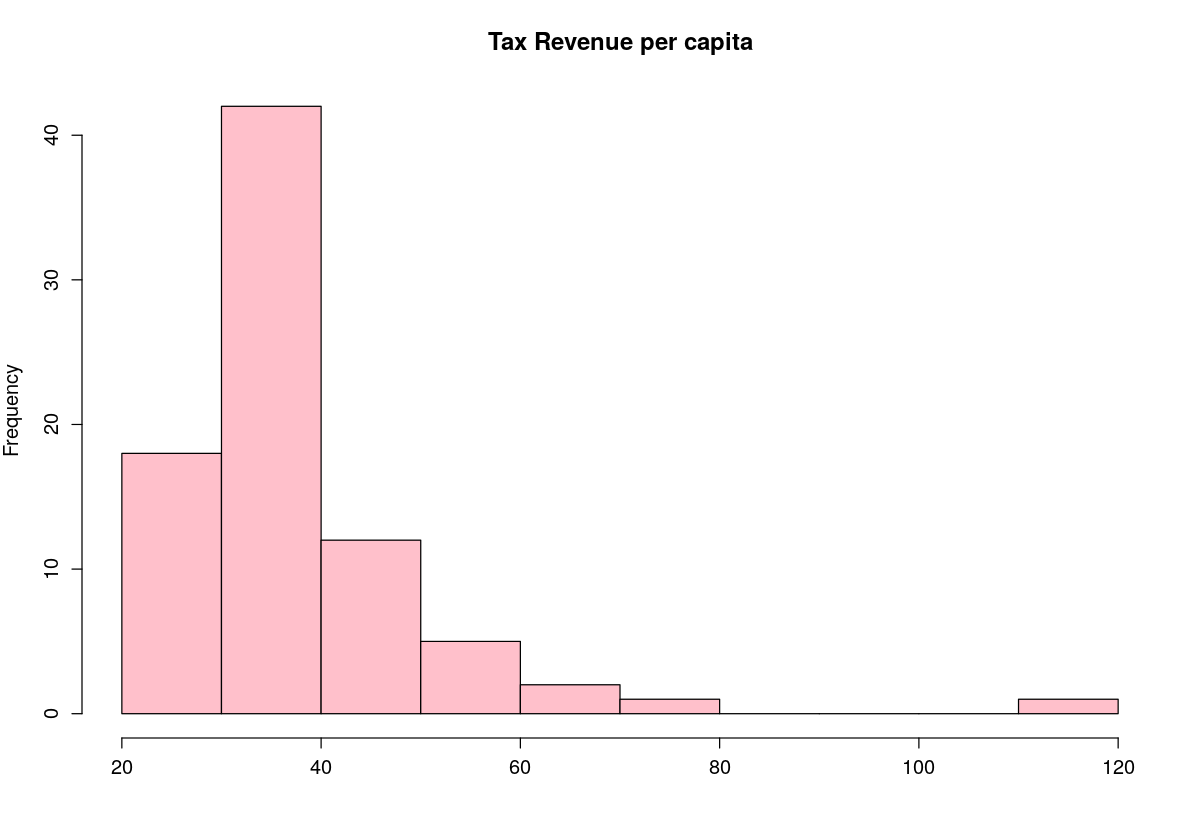

In [34]:
hist(crime_cleaned$taxpc, 
     main="Tax Revenue per capita",
     ylab="Frequency", 
     col='pink', xlab=NULL)

But we will decide to leave it because it is possible for tax per capita to be that high. If a particular county has less people but really high income or just really high income, then they might be paying more state tax per head

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  133.0   230.3   253.6   255.2   278.1   391.3 

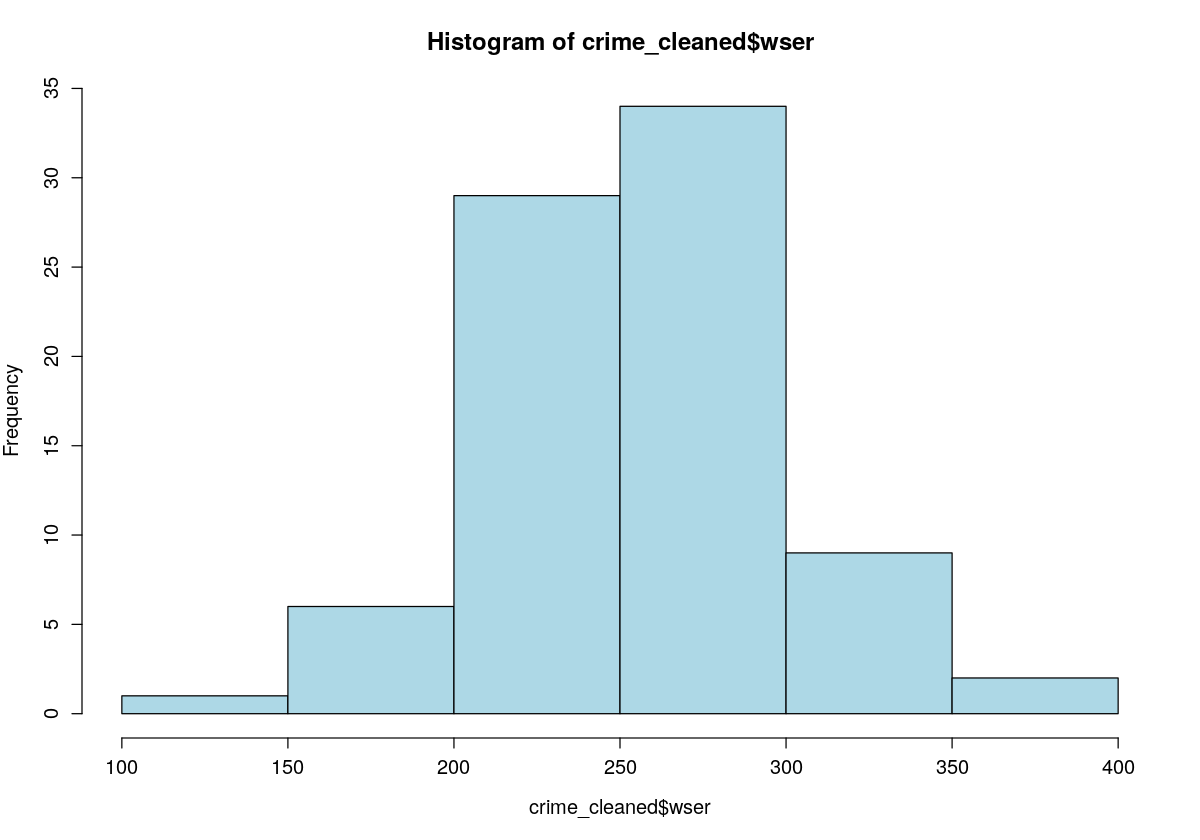

In [35]:
summary(crime_cleaned$wser)
hist(crime_cleaned$wser, col='light blue')

In [36]:
summary(crime_cleaned$county)

Length  Class   Mode 
     0   NULL   NULL 

In [37]:
crime_cleaned$county <- NULL
summary(crime_cleaned$county)

Length  Class   Mode 
     0   NULL   NULL 

In [38]:
summary(crime_cleaned$year)

Length  Class   Mode 
     0   NULL   NULL 

In [39]:
crime_cleaned$year <- NULL
crime_cleaned <-na.omit(crime_cleaned)

In [40]:
crime_cleaned <-na.omit(crime_cleaned)

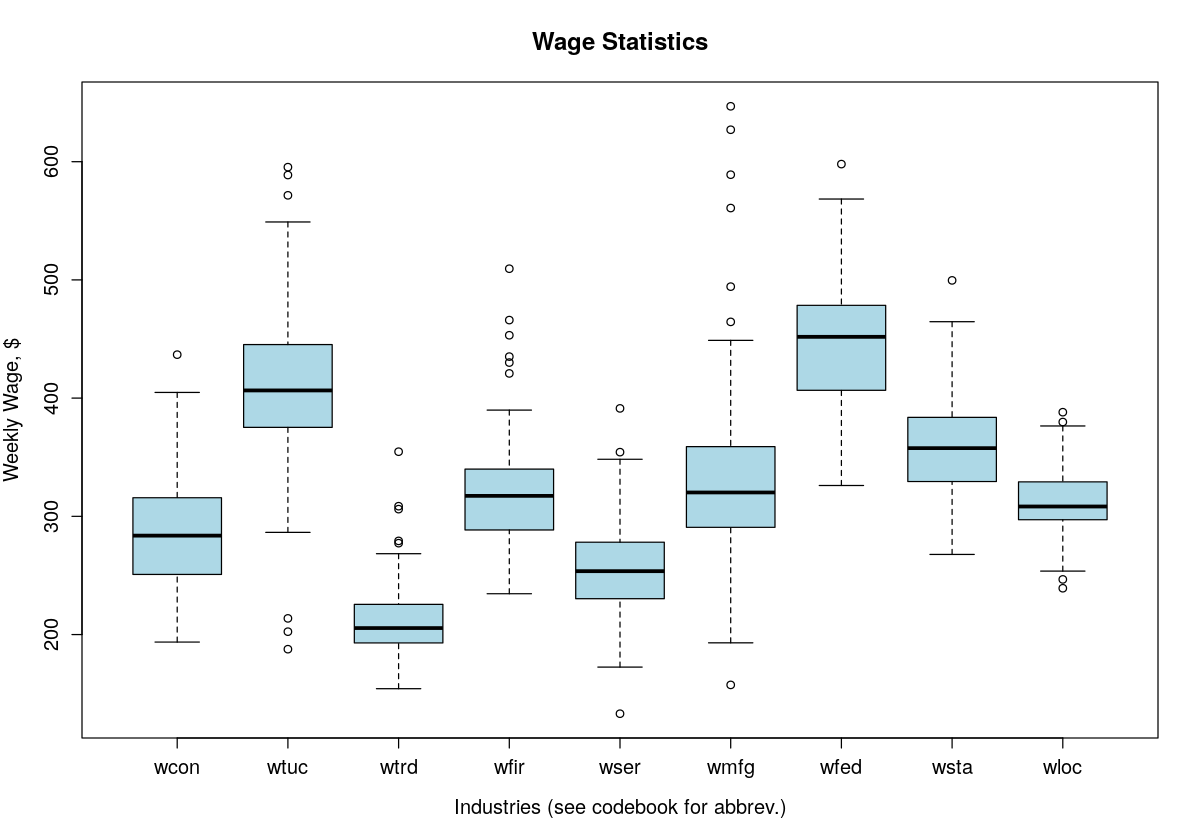

In [41]:
boxplot(crime_cleaned[c(13:21)], 
        ylab = "Weekly Wage, $", 
        xlab = "Industries (see codebook for abbrev.)",
        data = crime_cleaned,
        main = "Wage Statistics",
        col = "lightblue")

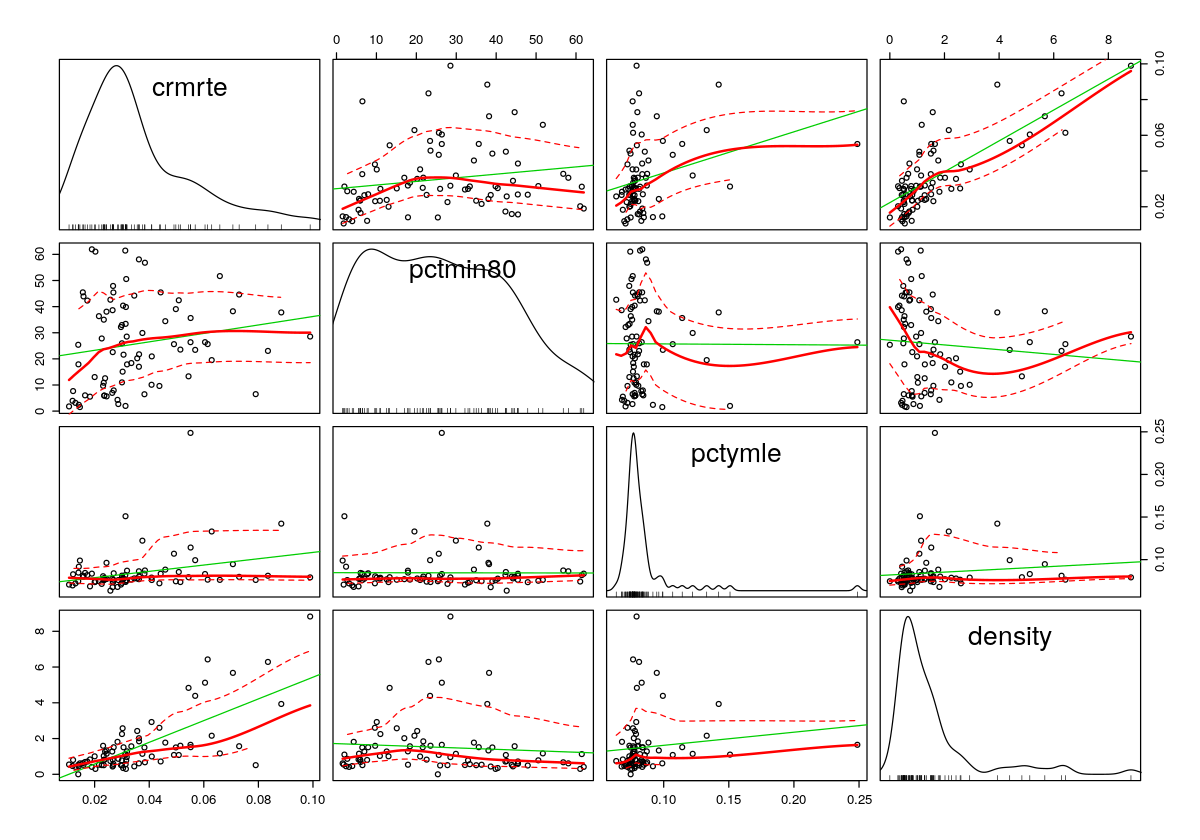

In [42]:
scatterplotMatrix(crime_cleaned[,c("crmrte","pctmin80","pctymle", "density")])

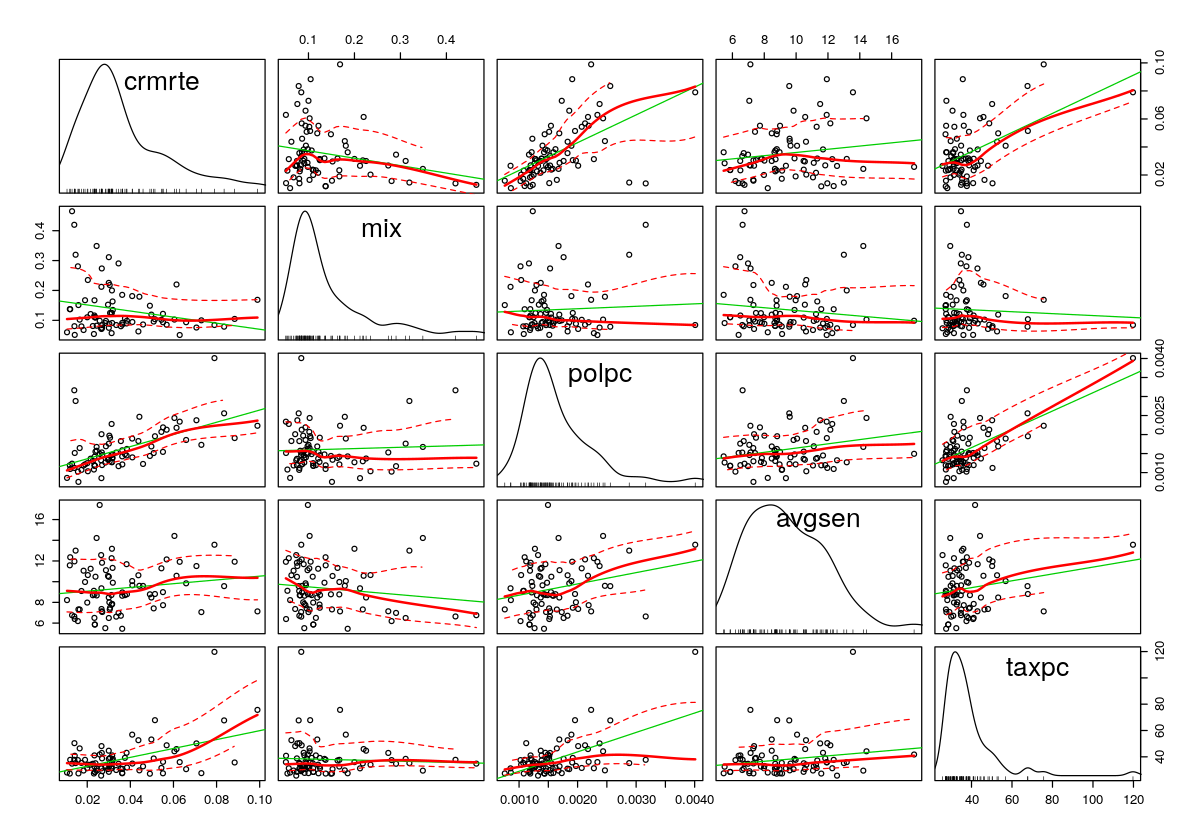

In [43]:
scatterplotMatrix(crime_cleaned[,c("crmrte", "mix","polpc","avgsen", "taxpc")])

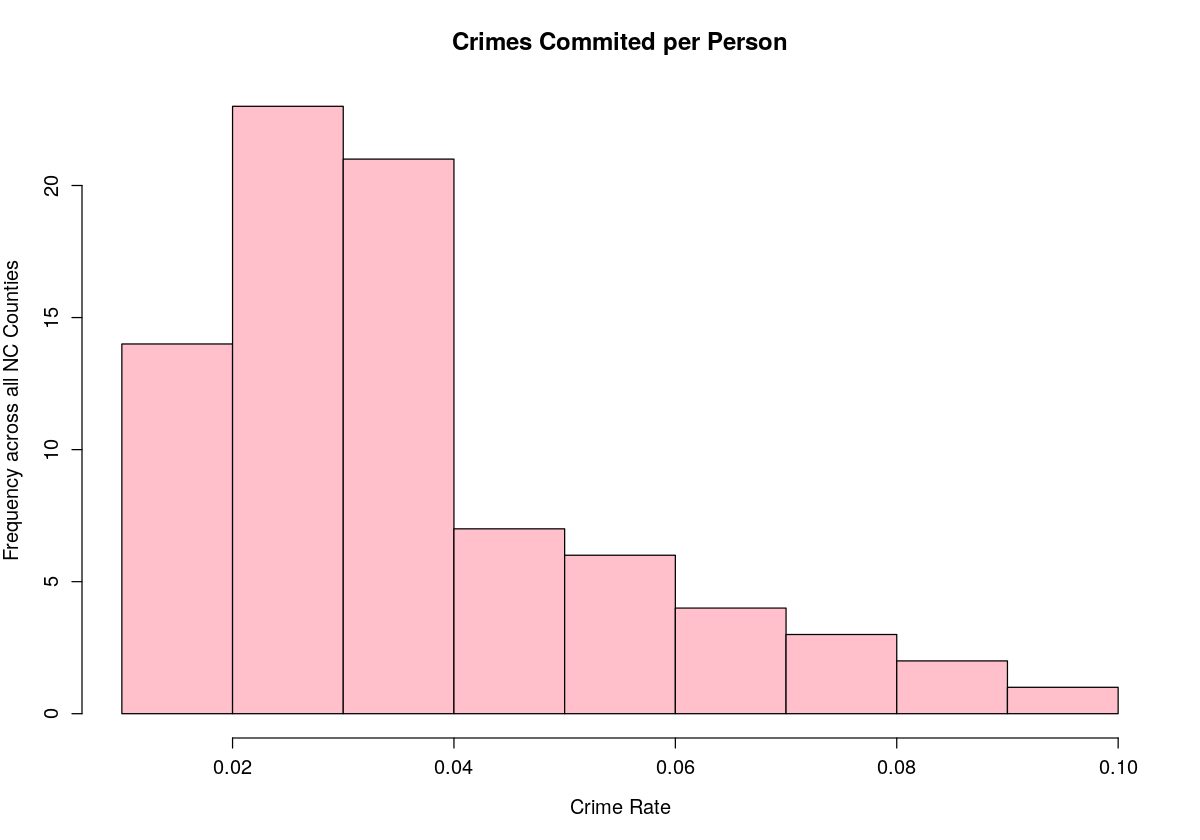

In [29]:
hist(crime_cleaned$crmrte, 
     xlab='Crime Rate', 
     ylab='Frequency across all NC Counties', 
     col='pink', 
     main='Crimes Commited per Person')

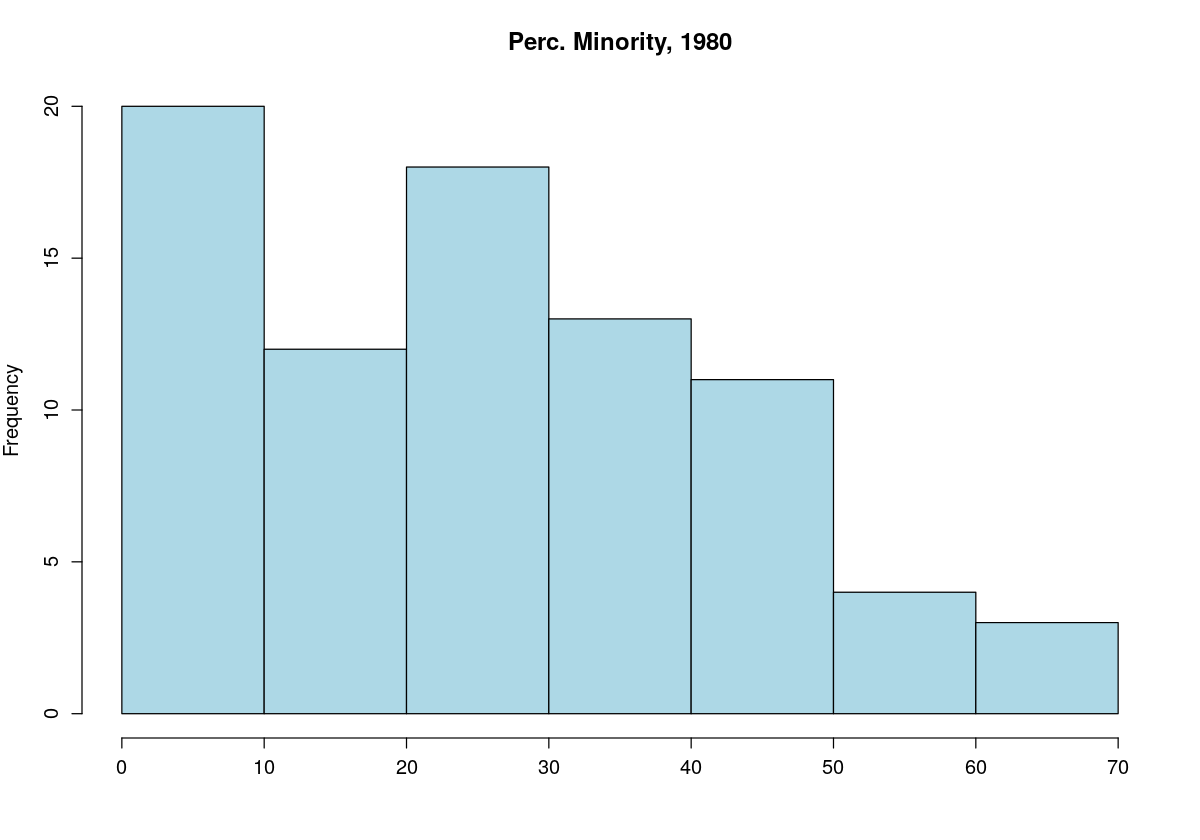

In [30]:
hist(crime_cleaned$pctmin80, main = "Perc. Minority, 1980", col='lightblue', xlab=NULL)

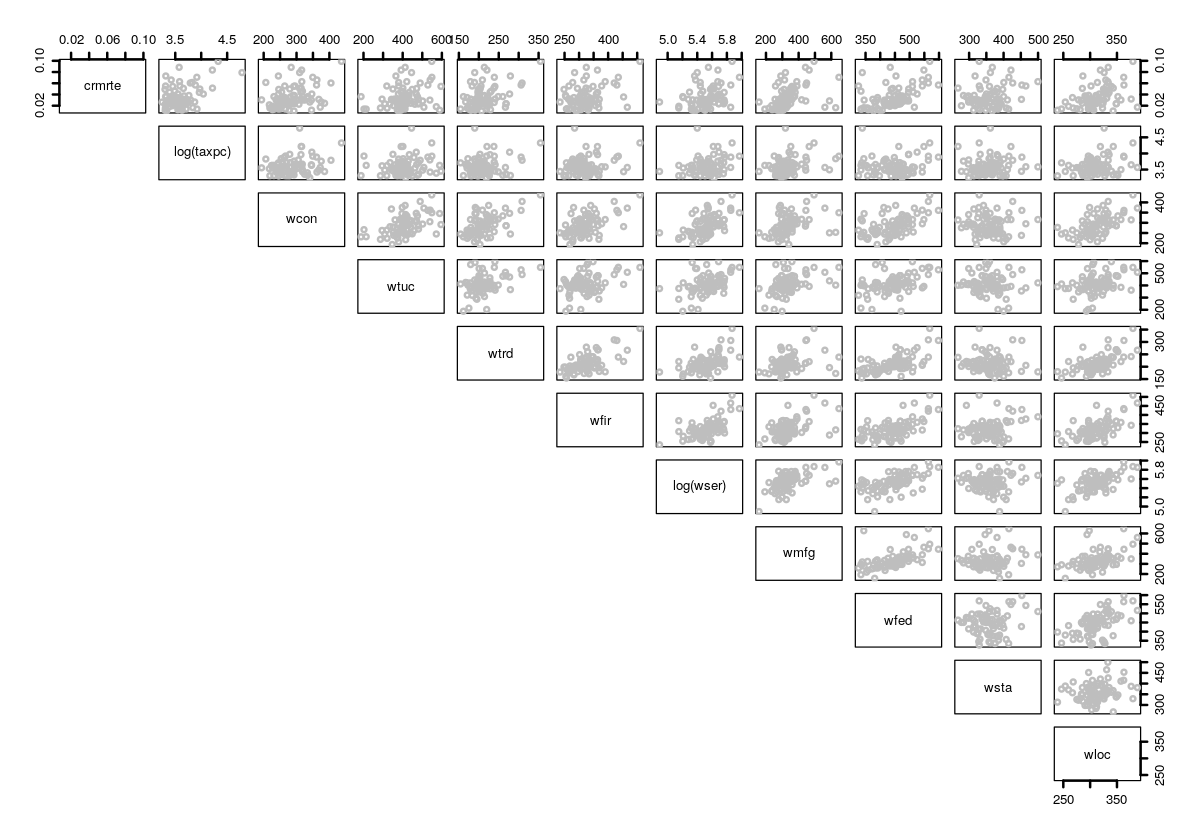

In [22]:
pairs(~crmrte + log(taxpc) + wcon + wtuc + wtrd + wfir + log(wser) + wmfg + wfed + 
      wsta + wloc,
      data = crime_cleaned,
      cex.labels=1, 
      lower.panel = NULL,
      pch=1, cex=1, lwd=2, 
      col="grey")
options(repr.plot.height = 7, repr.plot.width = 10, repr.plot.pointsize = 10)

## Model Building Process
### Model 1

In [53]:
head(crime_cleaned)
m1 <- lm(crmrte ~ prbarr + prbconv + prbpris, data=crime_cleaned)
m1

,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0356036,0.298270,0.5275960,0.436170,6.71,0.00182786,2.4226327,30.99368,0,1,⋯,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,0.0129603,0.444444,0.2678570,0.600000,6.76,0.00123431,0.4127659,34.81605,1,0,⋯,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
4,0.0267532,0.364760,0.5254240,0.435484,7.14,0.00152994,0.4915572,42.94759,0,1,⋯,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
5,0.0106232,0.518219,0.4765630,0.442623,8.22,0.00086018,0.5469484,28.05474,1,0,⋯,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
6,0.0146067,0.524664,0.0683761,0.500000,13.00,0.00288203,0.6113361,35.22974,1,0,⋯,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920
7,0.0296409,0.365004,0.5206070,0.420833,10.55,0.00133771,0.5169492,30.69649,0,0,⋯,366.3004,205.5358,310.1737,259.3391,303.42,449.84,350.72,283.76,0.15237226,0.07073344



Call:
lm(formula = crmrte ~ prbarr + prbconv + prbpris, data = crime_cleaned)

Coefficients:
(Intercept)       prbarr      prbconv      prbpris  
    0.08040     -0.09568     -0.04105      0.00426  


Q1. Identify what you want to measure with each coefficient

The model m1 predicts the crime rate(crmrte) using probability of arrest(prbarr), probability of conviction(prbconv) and probability of prison sentence(prbpris).

Q2. Interpret the result of the regression in a thorough and convincing manner

Judging from the residual and the fitted values plot, the regression line fitted the data well. We can see that the residuals mostly range from -0.02 to 0.02, which is relatively small.

Q3. Evaluate all 6 CLM assumptions

    1.Linear population model

         We haven't constrained the error term yet, which means this assumption is fulfilled automatically.

    2.Random Sampling

        No, since we are provided the odd number county code, we can not conclude it is random sampled . The original data set could be sorted in some order.

    3.No perfect multicollinearity

    Checked with vif(m1) and got prbarr=1.016588, prbconv=1.015617, prbpris=1.002150. We can see that R kept all variables with no errors, so this assumption was necessarily fulfilled.

    4.Zero-conditional mean

    Looked at the graph resid vs. fitted values, we can see that there's a strong curvature, so appears to be violated.

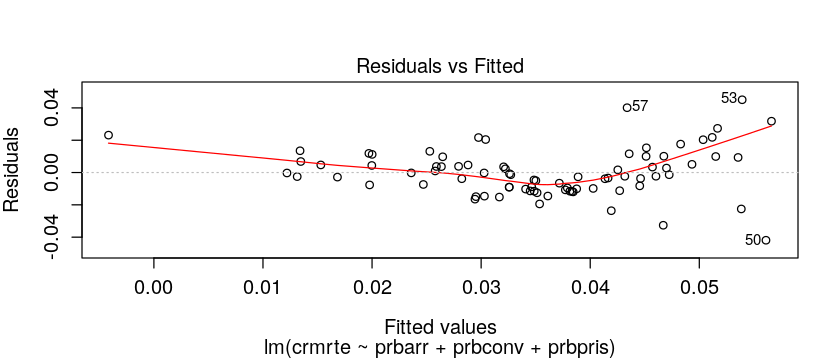

In [57]:
plot(m1, which=1)
options(repr.plot.width=7, repr.plot.height=3)

    5.Homoskedasticity

    Looked at the scale-location graph, we do not see a flat line, so appears to be violated.

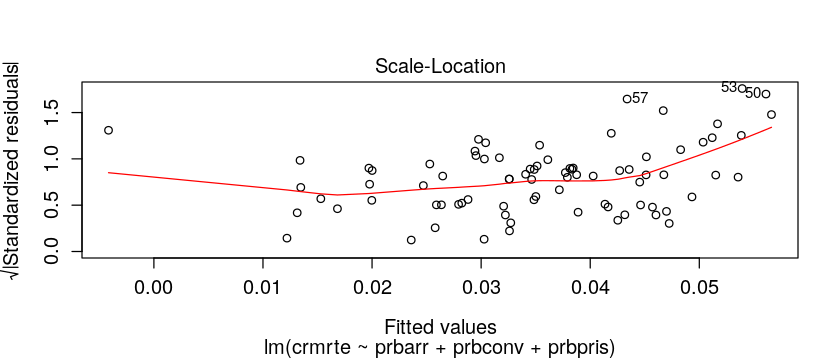

In [59]:
plot(m1, which=3)
options(repr.plot.width=7, repr.plot.height=3)

    6.Normality of Errors
    Look at QQ plot, we'll rely on the CLT, and know that our coefficients have a roughly normal sampling distribution.

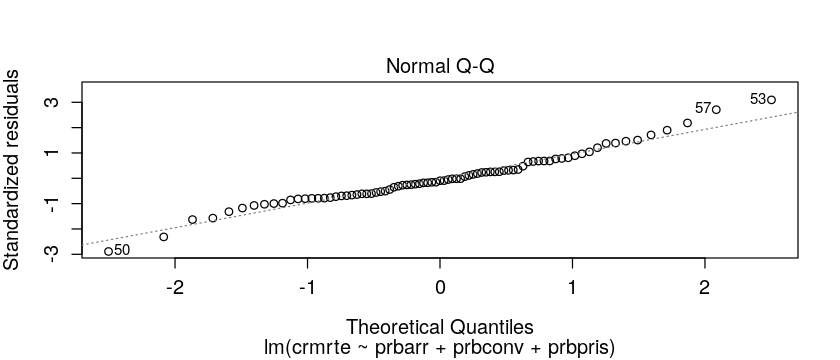

In [60]:
plot(m1, which=2)
options(repr.plot.width=7, repr.plot.height=3)

### Model 2

In [54]:
m2 <- lm(crmrte ~ prbarr + polpc + density, data=crime_cleaned)
m2


Call:
lm(formula = crmrte ~ prbarr + polpc + density, data = crime_cleaned)

Coefficients:
(Intercept)       prbarr        polpc      density  
   0.021791    -0.046586    11.564395     0.005818  


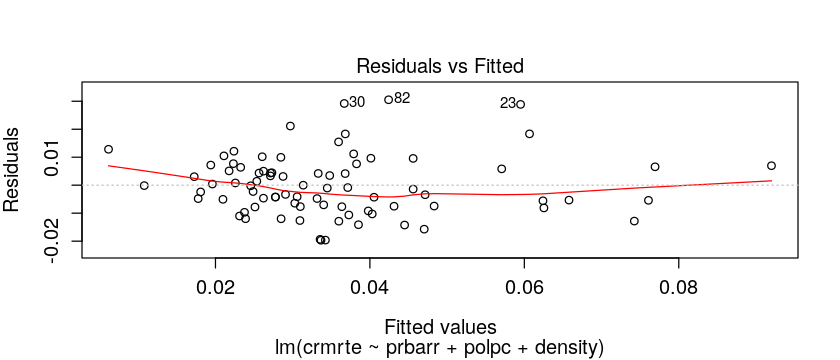

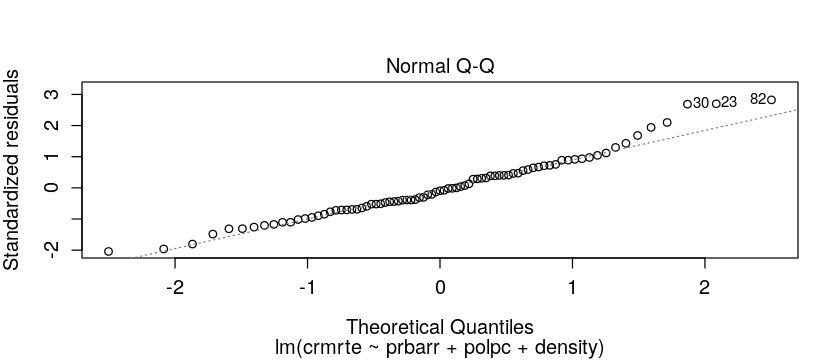

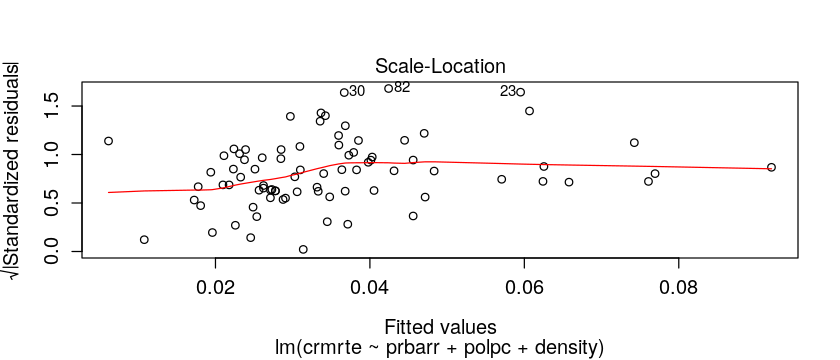

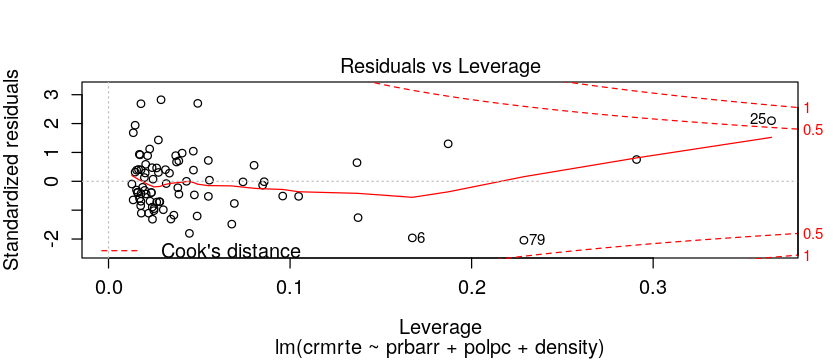

In [61]:
plot(m2)
options(repr.plot.width=7, repr.plot.height=3)

In [64]:
summary(m2, vcov = vcovHC)


Call:
lm(formula = crmrte ~ prbarr + polpc + density, data = crime_cleaned)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.019674 -0.007524 -0.001027  0.006377  0.030527 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0217911  0.0056489   3.858 0.000236 ***
prbarr      -0.0465864  0.0122738  -3.796 0.000292 ***
polpc       11.5643955  2.4998708   4.626 1.48e-05 ***
density      0.0058177  0.0009106   6.389 1.16e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01097 on 77 degrees of freedom
Multiple R-squared:  0.6741,	Adjusted R-squared:  0.6614 
F-statistic:  53.1 on 3 and 77 DF,  p-value: < 2.2e-16


Q1. Identify what you want to measure with each coefficient
The model m2 predicts the crime rate(crmrte) using probability of arrest(prbarr), police per capita(polpc) and people per sq. mile(density).

Q2. Interpret the result of the regression in a thorough and convincing manner



Q3. Evaluate all 6 CLM assumptions

    1.Linear population model

         

    2.Random Sampling

        

    3.No perfect multicollinearity

    

    4.Zero-conditional mean



    5.Homoskedasticity


    
    6.Normality of Errors




### Model 3

In [65]:
lm(crmrte ~ ., data=crime_cleaned)


Call:
lm(formula = crmrte ~ ., data = crime_cleaned)

Coefficients:
(Intercept)       prbarr      prbconv      prbpris       avgsen        polpc  
  1.148e-02   -5.266e-02   -7.753e-03    9.420e-03   -8.044e-04    1.070e+01  
    density        taxpc         west      central        urban     pctmin80  
  5.240e-03    2.012e-04   -4.215e-03   -5.888e-03    1.874e-03    2.874e-04  
       wcon         wtuc         wtrd         wfir         wser         wmfg  
  2.914e-05    1.493e-05    5.212e-05   -5.180e-05   -8.435e-05   -3.012e-06  
       wfed         wsta         wloc          mix      pctymle  
  3.754e-05   -4.892e-05    4.804e-05   -2.300e-02    1.443e-01  


In [67]:
summary(step(lm(crmrte ~ ., data=crime_cleaned), direction="backward"))

Start:  AIC=-782.21
crmrte ~ prbarr + prbconv + prbpris + avgsen + polpc + density + 
    taxpc + west + central + urban + pctmin80 + wcon + wtuc + 
    wtrd + wfir + wser + wmfg + wfed + wsta + wloc + mix + pctymle

           Df  Sum of Sq       RSS     AIC
- wmfg      1 0.00000260 0.0029395 -784.14
- urban     1 0.00000611 0.0029430 -784.05
- prbpris   1 0.00003224 0.0029691 -783.33
- wtuc      1 0.00005590 0.0029928 -782.69
- wloc      1 0.00006045 0.0029973 -782.56
- west      1 0.00006208 0.0029990 -782.52
- wcon      1 0.00006335 0.0030002 -782.48
<none>                   0.0029369 -782.21
- wtrd      1 0.00008218 0.0030191 -781.98
- prbconv   1 0.00008335 0.0030202 -781.95
- wfed      1 0.00011799 0.0030549 -781.02
- mix       1 0.00014177 0.0030786 -780.39
- wfir      1 0.00018352 0.0031204 -779.30
- taxpc     1 0.00019290 0.0031298 -779.06
- avgsen    1 0.00020724 0.0031441 -778.69
- wsta      1 0.00022020 0.0031571 -778.36
- central   1 0.00026805 0.0032049 -777.14
- wser   


Call:
lm(formula = crmrte ~ prbarr + avgsen + polpc + density + taxpc + 
    central + pctmin80 + wtuc + wtrd + wfir + wser + wfed + wsta + 
    wloc + mix + pctymle, data = crime_cleaned)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0101324 -0.0045724 -0.0008551  0.0039888  0.0187385 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.170e-03  1.528e-02   0.207  0.83630    
prbarr      -5.353e-02  9.400e-03  -5.695 3.35e-07 ***
avgsen      -7.210e-04  3.719e-04  -1.939  0.05693 .  
polpc        1.006e+01  2.320e+00   4.336 5.24e-05 ***
density      5.625e-03  7.881e-04   7.138 1.06e-09 ***
taxpc        2.829e-04  8.785e-05   3.220  0.00201 ** 
central     -3.580e-03  1.858e-03  -1.928  0.05836 .  
pctmin80     3.552e-04  5.511e-05   6.445 1.73e-08 ***
wtuc         1.767e-05  1.269e-05   1.392  0.16875    
wtrd         7.023e-05  3.862e-05   1.818  0.07369 .  
wfir        -6.489e-05  2.540e-05  -2.555  0.01300 *  
wser       

In [68]:
m3 <- lm(crmrte ~ prbarr + polpc + density + taxpc + pctmin80, data=crime_cleaned)
m3


Call:
lm(formula = crmrte ~ prbarr + polpc + density + taxpc + pctmin80, 
    data = crime_cleaned)

Coefficients:
(Intercept)       prbarr        polpc      density        taxpc     pctmin80  
  0.0106559   -0.0593248   10.2995061    0.0054180    0.0002023    0.0003825  


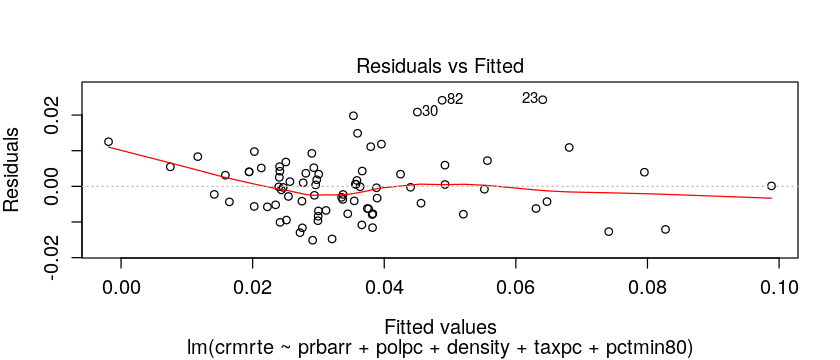

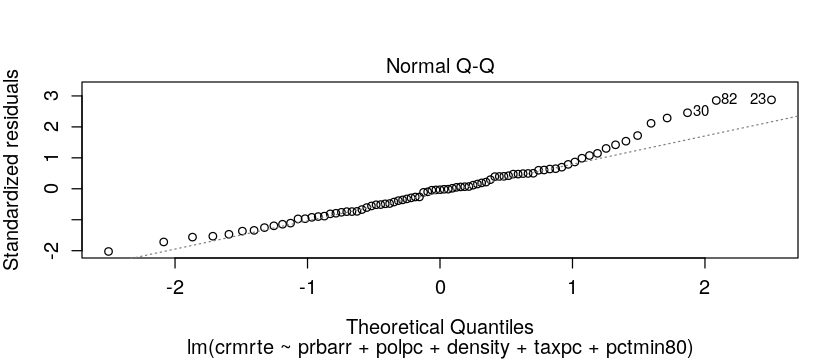

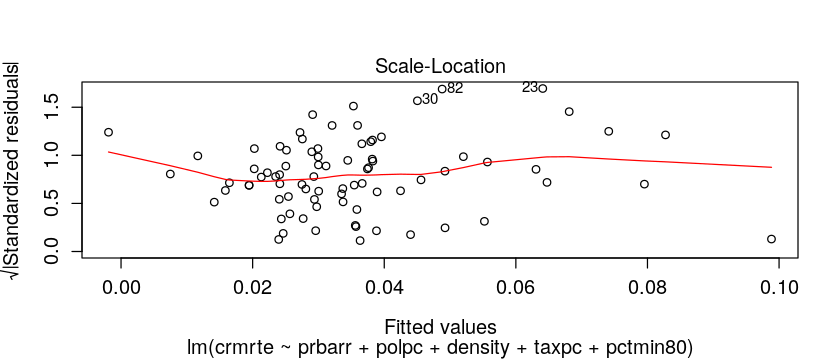

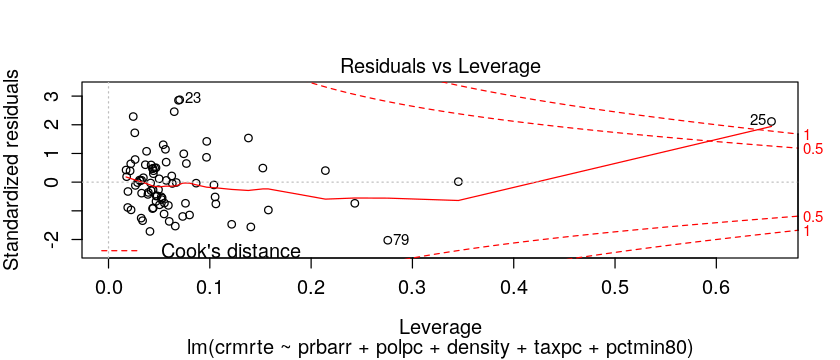

In [69]:
plot(m3)
options(repr.plot.width=7, repr.plot.height=3)

In [70]:
summary(m3, vcov = vcovHC)


Call:
lm(formula = crmrte ~ prbarr + polpc + density + taxpc + pctmin80, 
    data = crime_cleaned)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0151243 -0.0062145 -0.0002637  0.0042468  0.0242970 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.066e-02  4.874e-03   2.186   0.0319 *  
prbarr      -5.932e-02  1.000e-02  -5.930 8.66e-08 ***
polpc        1.030e+01  2.375e+00   4.337 4.43e-05 ***
density      5.418e-03  7.360e-04   7.362 1.94e-10 ***
taxpc        2.023e-04  9.298e-05   2.175   0.0328 *  
pctmin80     3.825e-04  6.002e-05   6.374 1.35e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.008773 on 75 degrees of freedom
Multiple R-squared:  0.7969,	Adjusted R-squared:  0.7834 
F-statistic: 58.86 on 5 and 75 DF,  p-value: < 2.2e-16


Q1. Identify what you want to measure with each coefficient


Q2. Interpret the result of the regression in a thorough and convincing manner


Q3. Evaluate all 6 CLM assumptions

    1.Linear population model



    2.Random Sampling



    3.No perfect multicollinearity



    4.Zero-conditional mean


    
    5.Homoskedasticity

   
   
    6.Normality of Errors
    
    
    

## Regression Table

In [72]:
se.m1 = coef(summary(m1))[, "Std. Error"]
se.m2 = coef(summary(m2))[, "Std. Error"]
se.m3 = coef(summary(m3))[, "Std. Error"]

In [73]:
stargazer(m1, m2, m3, type = "text",
          title = "Linear Models Predicting Crime Rates in North Carolina",
          se = list(se.m1, se.m2, se.m3), omit.stat=c("f","ser"),
          star.cutoffs = c(0.05, 0.01, 0.001))


Linear Models Predicting Crime Rates in North Carolina
                   Dependent variable:      
             -------------------------------
                         crmrte             
                (1)        (2)        (3)   
--------------------------------------------
prbarr       -0.096***  -0.047***  -0.059***
              (0.016)    (0.012)    (0.010) 
                                            
prbconv      -0.041***                      
              (0.010)                       
                                            
prbpris        0.004                        
              (0.021)                       
                                            
polpc                   11.564***  10.300***
                         (2.500)    (2.375) 
                                            
density                  0.006***  0.005*** 
                         (0.001)    (0.001) 
                                            
taxpc                               0.0002* 

## Omitted Variables Discussion

There are many omitted variables that could affect the outcomes:


1. Wealth  (Effect Tax per capita)
2. Weather (Effect Density)
3. Demographics within each industry
4. Cost of Living
5. Education


## Conclusion

In [76]:
AIC(m1)
AIC(m2)
AIC(m3)

[1] -445.2227

[1] -495.3031

[1] -529.6119